<a href="https://colab.research.google.com/github/LukeGSCSU/CSC-481GAs/blob/main/GA_Multiple_Runs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Select a function to optimize:
1. Rastrigin
2. Sphere
3. Ackley
4. Rosenbrock
5. Griewank
Enter the number of the function: 4


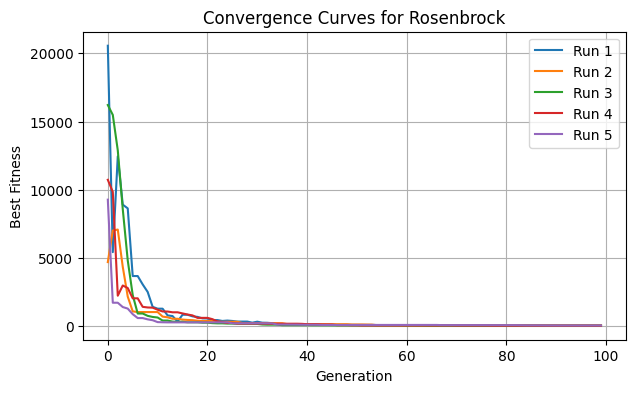

Best parameters out of all runs: 0.091, 0.009, 0.027, 0.197, 0.220, 0.198, 0.054, 0.133, 0.001, -0.042
Best fitness value: 18.632


In [ ]:
# Import the necessary libraries for plotting
import matplotlib.pyplot as plt
# Import the numpy module for numerical operations
import numpy as np
# Import the random module for generating random numbers
import random

# Define the optimization functions
def rastrigin(x):
    A = 10
    return A * len(x) + sum([(xi**2 - A * np.cos(2 * np.pi * xi)) for xi in x])

def sphere_function(x):
    return sum([xi**2 for xi in x])

def ackley(x):
    a = 20
    b = 0.2
    c = 2 * np.pi
    n = len(x)
    sum1 = sum([xi**2 for xi in x])
    sum2 = sum([np.cos(c * xi) for xi in x])
    term1 = -a * np.exp(-b * np.sqrt(sum1 / n))
    term2 = -np.exp(sum2 / n)
    return term1 + term2 + a + np.exp(1)

def rosenbrock(x):
    return sum([100 * (x[i+1] - x[i]**2)**2 + (1 - x[i])**2 for i in range(len(x) - 1)])

def griewank(x):
    sum_part = sum([xi**2 / 4000 for xi in x])
    prod_part = np.prod([np.cos(xi / np.sqrt(i + 1)) for i, xi in enumerate(x)])
    return sum_part - prod_part + 1

# GA Parameters
population_size = 100
genome_length = 10
crossover_rate = 0.8
mutation_rate = 0.01
num_generations = 100
bounds = [-5.12, 5.12]

# Initialization
def initialize_population(pop_size, genome_len, bounds):
    return [np.random.uniform(bounds[0], bounds[1], genome_len) for _ in range(pop_size)]

# Fitness function
def evaluate_fitness(population, func):
    return [func(individual) for individual in population]

# Selection (Tournament Selection)
def tournament_selection(population, fitness, tournament_size=3):
    selected = []
    for _ in range(len(population)):
        aspirants = [random.randint(0, len(population) - 1) for _ in range(tournament_size)]
        selected.append(min(aspirants, key=lambda aspirant: fitness[aspirant]))
    return [population[i] for i in selected]

# Crossover (Single Point Crossover)
def single_point_crossover(parent1, parent2):
    if random.random() < crossover_rate:
        point = random.randint(1, len(parent1) - 1)
        child1 = np.concatenate([parent1[:point], parent2[point:]])
        child2 = np.concatenate([parent2[:point], parent1[point:]])
        return child1, child2
    return parent1, parent2

# Mutation
def mutate(individual, mutation_rate, bounds):
    for i in range(len(individual)):
        if random.random() < mutation_rate:
            individual[i] = np.random.uniform(bounds[0], bounds[1])
    return individual

# Genetic Algorithm
def genetic_algorithm(func):
    # Initialize the population
    population = initialize_population(population_size, genome_length, bounds)

    # List to store the best fitness at each generation for plotting
    best_fitness_over_time = []

    # Iterate over the number of generations
    for generation in range(num_generations):
        # Evaluate the fitness of the population
        fitness = evaluate_fitness(population, func)

        # Selection
        selected_population = tournament_selection(population, fitness)

        # Crossover
        next_population = []
        for i in range(0, len(selected_population), 2):
            parent1 = selected_population[i]
            parent2 = selected_population[min(i + 1, len(selected_population) - 1)]
            child1, child2 = single_point_crossover(parent1, parent2)
            next_population.extend([child1, child2])

        # Mutation
        population = [mutate(individual, mutation_rate, bounds) for individual in next_population]

        # Evaluate the fitness of the new population
        fitness = evaluate_fitness(population, func)

        # Find the best fitness and individual
        best_fitness = min(fitness)
        best_individual = population[fitness.index(best_fitness)]

        # Append the best fitness to the list
        best_fitness_over_time.append(best_fitness)

    # Return the best individual and the convergence curve
    return best_individual, best_fitness_over_time

# Define a dictionary to map function numbers to functions
functions = {
    1: rastrigin,
    2: sphere_function,
    3: ackley,
    4: rosenbrock,
    5: griewank
}

# Prompt user to select a function
print("Select a function to optimize:")
print("1. Rastrigin")
print("2. Sphere")
print("3. Ackley")
print("4. Rosenbrock")
print("5. Griewank")
selected_function_num = int(input("Enter the number of the function: "))

# Check if the selected function number is valid
if selected_function_num not in functions:
    raise ValueError("Invalid function number selected.")

selected_function = functions[selected_function_num]

# Run the genetic algorithm 5 times and store the convergence curves
num_runs = 5
all_fitness_curves = []
best_individuals = []
best_fitness_values = []

for _ in range(num_runs):
    # Run the genetic algorithm for the selected function
    best_individual, best_fitness_curve = genetic_algorithm(selected_function)
    all_fitness_curves.append(best_fitness_curve)
    best_fitness_values.append(min(best_fitness_curve))
    best_individuals.append(best_individual)

# Plot all convergence curves
plt.figure(figsize=(7,4))

for idx, fitness_curve in enumerate(all_fitness_curves):
    plt.plot(fitness_curve, label=f'Run {idx + 1}')

plt.title(f"Convergence Curves for {selected_function.__name__.replace('_', ' ').title()}")
plt.xlabel("Generation")
plt.ylabel("Best Fitness")
plt.legend()
plt.grid(True)
plt.show()

# Print the best parameters and their fitness values
best_overall_index = np.argmin(best_fitness_values)
print(f"Best parameters out of all runs: {', '.join(f'{param:5.3f}' for param in best_individuals[best_overall_index])}")
print(f"Best fitness value: {best_fitness_values[best_overall_index]:5.3f}")